### Laboratorio de Escalonamento ###

Neste laboratório, iremos simular o funcionamento de algoritmos de escalonamento básicos para entender melhor seu funcionamento.

Na célula abaixo, temos uma classe Processo, que tem as informações de execução, e uma classe de exemplo de escalonamento apenas com os protótipos:

(orientação a objeto em Python)

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Processo(object):
    def __init__(self,pnome,pio,ptam,prioridade,tempoChegada):
        self.nome = pnome
        self.io = pio # Probabilidade de fazer E/S, inicialmente zero
        self.tam = ptam # Quantos Timeslices sao necessarios para terminar
        self.prio = prioridade # Prioridade, eh desnecessaria aora 
        self.chegada = tempoChegada

    def roda(self,quantum=None): # se rodar sem quantum, o processor roda ate o fim
        if(random.randint(1,100)<self.io): #Verifica se fez E/S
            self.tam-=1
            print(self.nome," fez e/s, falta ",self.tam)
            return 1, True #True que fez E/S
            
            
        if(quantum is None or self.tam<quantum):
            quantum = self.tam
        self.tam -=quantum
        print(self.nome," rodou por ",quantum," timeslice, faltam ",self.tam)
        return quantum, False # False se nao fez E/S

In [4]:
def tempExec(self,tempoTermino):
    return tempoTermino - self.chegada

# tempo de resposta: quanto tempo demorou para o processo ser executado pela primeira vez desde que foi criado
def tempResp(self,tempoExec1):
    return tempoExec1 - self.chegada

# tempo de espera: quanto tempo passou no estado pronto antes de ser executado pela primeira vez

Na célula abaixo, são criados quatro processos completamente CPU-Bound que precisam de 3 timeslices para rodar.

O valor de E/S é um número entre 0 e 100 indicando quantos porcento de chance o processo tem de fazer E/S durante seu tempo na CPU

Na célula abaixo, temos uma simulação do funcionamento de um escalonador de processos. As duas configurações importantes aqui são o valor do quantum padrão (que pode ser dinamico em algoritmos mais complexos, e quantos timeslices um processo que faz e/s passa bloqueado.

Percebam que na terceira linha é instanciado o escalonador (neste caso, um round_robin). Isto foi feito assim para ser simples trocar o escalonador e repetir a simulação, bastando criar uma classe com os métodos pronto, proximo e construtor e alterar esta linha.

### Laboratório: ###


1 - Altere o simulador acima para calcular o tempo de execucao medio e tempo de resposta 

2 - Implemente o escalonador por FIFO e SJF e verifique seus tempos de execução e espera.

3 - Faça em outra célula uma implementação do STCF e Round Robin, alterando o p.roda() para receber o quantum


Na segunda feira (15) haverá um questionário no ColabWeb onde você deverá utilizar suas implementações para responder às perguntas. Na terça de manhã farei uma breve conferência para tirar dúvidas.

In [95]:
class FIFO(object):     
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que chegam no tempo zero, no caso de FIFO - todos

    def pronto(self,Processo):
        # implemente aqui o que escalonador faz quando surge um novo processo pronto: add na fila
        self.prontos.append(Processo)
        
    def proximo(self):
        # implemente aqui a politica de escalonamento para definir um processo a ser executado
            # retira da fila o proximo a ser executado
            # "executa" -> somar o tempo do processo ao tempo total de execução        
        p = self.prontos.pop(0)
        return p #processo p eh escolhido

In [96]:
# QUESTIONARIO 1.1
# nprocs = 5
# nomes = ['A','B','C','D','E']
# chanceio = [0,0,0,0,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero

# tamanhoFIFO = np.array([20,20,20,20,20])
# tempoCheg = [0,0,0,0,0]

# QUESTIONARIO 1.2
nprocs = 4
nomes = ['A','B','C','D']
chanceio = [0,0,0,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero

tamanhoFIFO = np.array([10,20,30,40])
tempoCheg = [0,0,0,0]

totalFIFO = tamanhoFIFO.sum()

procsFIFO = []
for i in range(nprocs):
    procsFIFO.append(Processo(nomes[i],chanceio[i],tamanhoFIFO[i],0,tempoCheg[i])) #cria uma lista procs de Processos

tempoMedioExec = 0
tempoMedioResp = 0
tempo = 0

escFIFO = FIFO(procsFIFO)

random.seed(0)

while totalFIFO>0:
    p = escFIFO.proximo()
    if(p is not None):
        rodou, _ = p.roda() #adicione quantum como parâmetro, por enquanto nao temos E/S
        
        if(p.tam>0):
            escFIFO.pronto(p)
        totalFIFO-=rodou
        print("Tempo resposta - ", p.nome,": ", tempResp(p, tempo))
        tempoMedioResp += tempResp(p, tempo)
        tempo+=rodou
        print("Tempo execucao - ", p.nome,": ", tempExec(p, tempo))
        tempoMedioExec += tempExec(p, tempo)
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade se nao havia ninguem pronto
        tempo+=1
print("")
print("Tempo medio execucao: ", tempoMedioExec/nprocs)
print("Tempo medio resposta: ", tempoMedioResp/nprocs)

A  rodou por  10  timeslice, faltam  0
Tempo resposta -  A :  0
Tempo execucao -  A :  10
B  rodou por  20  timeslice, faltam  0
Tempo resposta -  B :  10
Tempo execucao -  B :  30
C  rodou por  30  timeslice, faltam  0
Tempo resposta -  C :  30
Tempo execucao -  C :  60
D  rodou por  40  timeslice, faltam  0
Tempo resposta -  D :  60
Tempo execucao -  D :  100

Tempo medio execucao:  50.0
Tempo medio resposta:  25.0


In [8]:
class SJF(object):     
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que chegam no tempo zero, no caso do SJF - todos
        
        # realiza a ordenação dos processos, visto que no SJF todos chegam no tempo 0
        for j in range(0, len(self.prontos)):
            for i in range(0, len(self.prontos)-1):
                if(self.prontos[i].tam > self.prontos[i+1].tam):
                    aux = self.prontos[i+1]
                    self.prontos[i+1] = self.prontos[i]
                    self.prontos[i] = aux
        
    def pronto(self,Processo):
        # implemente aqui o que escalonador faz quando surge um novo processo pronto: add na fila
        self.prontos.append(Processo)
        
    def proximo(self):
        # implemente aqui a politica de escalonamento para definir um processo a ser executado
            # os processos já estão ordenados por tempo menor, então é só seguir a fila
            # "executa" -> retira da fila e soma o tempo do processo ao tempo total de execução         
        p = self.prontos.pop(0)
        return p #processo p eh escolhido

In [30]:
# QUESTIONÁRIO 1.1
# nprocs = 5
# nomes = ['A','B','C','D','E']
# chanceio = [0,0,0,0,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero

# tamanhoSJF = np.array([20,20,20,20,20])
# tempoCheg = [0,0,0,0,0]

# QUESTIONÁRIO 1.2
nprocs = 4
nomes = ['A','B','C','D']
chanceio = [0,0,0,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero

tamanhoSJF = np.array([10,20,30,40])
tempoCheg = [0,0,0,0]

totalSJF = tamanhoSJF.sum()

procsSJF = []
x = [] # tamanho processo
y = [] # tempo resposta

for i in range(nprocs):
    procsSJF.append(Processo(nomes[i],chanceio[i],tamanhoSJF[i],0,tempoCheg[i])) #cria uma lista procs de Processos

tempoMedioExec = 0
tempoMedioResp = 0
tempo = 0

escSJF = SJF(procsSJF)

random.seed(0)

while totalSJF>0:
    p = escSJF.proximo()
    x.append(p.tam)
    if(p is not None):
        rodou, _ = p.roda() #adicione quantum como parâmetro, por enquanto nao temos E/S
        
        if(p.tam>0):
            escSJF.pronto(p)
        totalSJF-=rodou
        print("Tempo resposta - ", p.nome,": ", tempResp(p, tempo))
        tempoMedioResp += tempResp(p, tempo)
        y.append(tempResp(p, tempo))        
        tempo+=rodou
        print("Tempo execucao - ", p.nome,": ", tempExec(p, tempo))
        tempoMedioExec += tempExec(p, tempo)
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade se nao havia ninguem pronto
        tempo+=1
print("")
print("Tempo medio execucao: ", tempoMedioExec/nprocs)
print("Tempo medio resposta: ", tempoMedioResp/nprocs)

A  rodou por  10  timeslice, faltam  0
Tempo resposta -  A :  0
Tempo execucao -  A :  10
B  rodou por  20  timeslice, faltam  0
Tempo resposta -  B :  10
Tempo execucao -  B :  30
C  rodou por  30  timeslice, faltam  0
Tempo resposta -  C :  30
Tempo execucao -  C :  60
D  rodou por  40  timeslice, faltam  0
Tempo resposta -  D :  60
Tempo execucao -  D :  100

Tempo medio execucao:  50.0
Tempo medio resposta:  25.0


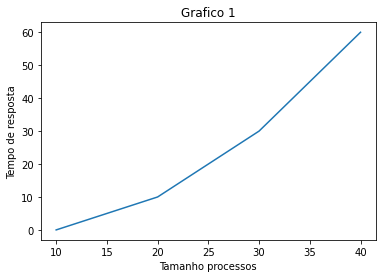

In [31]:
plt.plot(x,y)
plt.title('Grafico 1')
plt.ylabel('Tempo de resposta')
plt.xlabel('Tamanho processos')
plt.show()

In [5]:
class STCF(object):     
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que chegam no tempo zero
        
    def pronto(self,Processo):
        # implemente aqui o que escalonador faz quando surge um novo processo pronto
        self.prontos.append(Processo)
        
    def proximo(self):
        # implemente aqui a politica de escalonamento para definir um processo a ser executado     
        p = self.prontos.pop(0)
        return p #processo p eh escolhido

In [10]:
nprocs = 4
nomes = ['A','B','C','D']
chanceio = [0,0,0,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero

tamanhoSTCF = np.array([100,20,20,10])
tempoCheg = [0,2,2,4]

totalSTCF = tamanhoSTCF.sum()

procsSTCF = []
qArr = []

for i in range(nprocs):
    procsSTCF.append(Processo(nomes[i],chanceio[i],tamanhoSTCF[i],0,tempoCheg[i])) #cria uma lista procs de Processos
    if (tempoCheg[i] != 0):
        qArr.append(tempoCheg[i])
qArr.append(qArr[len(qArr)-1])
        
tempoMedioExec = 0
tempoMedioResp = 0
tempo = 0
j = 0

escSTCF = STCF(procsSTCF)

random.seed(0)

while totalSTCF>0:
    p = escSTCF.proximo()
    if(p is not None):
        if (j < len(qArr) and qArr[j] != p.chegada):
            rodou, _ = p.roda(qArr[j]) #adicione quantum como parâmetro, por enquanto nao temos E/S
        else:
            rodou, _ = p.roda() #adicione quantum como parâmetro, por enquanto nao temos E/S
        if(p.tam>0):
            escSTCF.pronto(p)
        totalSTCF-=rodou  
        tempo+=rodou
        print("Tempo execucao - ", p.nome,": ", tempExec(p, tempo))
        tempoMedioExec += tempExec(p, tempo)
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade se nao havia ninguem pronto
        tempo+=1
    j += 1
print("")
print("Tempo medio execucao: ", tempoMedioExec/nprocs)

A  rodou por  2  timeslice, faltam  98
Tempo execucao -  A :  2
B  rodou por  20  timeslice, faltam  0
Tempo execucao -  B :  20
C  rodou por  4  timeslice, faltam  16
Tempo execucao -  C :  24
D  rodou por  10  timeslice, faltam  0
Tempo execucao -  D :  32
A  rodou por  98  timeslice, faltam  0
Tempo execucao -  A :  134
C  rodou por  16  timeslice, faltam  0
Tempo execucao -  C :  148

Tempo medio execucao:  90.0


In [33]:
class RR(object): 
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que chegam no tempo zero        
        
    def pronto(self,Processo):
        # implemente aqui o que escalonador faz quando surge um novo processo pronto
        self.prontos.append(Processo)
        
    def proximo(self):
        # implemente aqui a politica de escalonamento para definir um processo a ser executado
        p = self.prontos.pop(0)
        return p #processo p eh escolhido


In [58]:
xQ = [] # quantum
yTR = [] # tempo resposta

In [59]:
# QUESTIONÁRIO 1.1
# nprocs = 5
# nomes = ['A','B','C','D','E']
# chanceio = [0,0,0,0,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero

# tamanhoRR = np.array([20,20,20,20,20])
# tempoCheg = [0,0,0,0,0]

# QUESTIONÁRIO 1.2
nprocs = 4
nomes = ['A','B','C','D']
chanceio = [0,0,0,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero

tamanhoRR = np.array([10,20,30,40])
tempoCheg = [0,0,0,0]

totalRR = tamanhoRR.sum()

procsRR = []


for i in range(nprocs):
    procsRR.append(Processo(nomes[i],chanceio[i],tamanhoRR[i],0,tempoCheg[i]))

escRR = RR(procsRR)

quantum = 2
tempo = 0
tempoMedioExec = 0
tempoMedioResp = 0

i = 0

while totalRR>0:
    p = escRR.proximo()
    if(p is not None):
        rodou, _ = p.roda(quantum) #adicione quantum como parâmetro, por enquanto nao temos E/S
        
        if(p.tam>0):
            escRR.pronto(p)
        totalRR-=rodou
        if(i < nprocs and ((p.tam + quantum) == tamanhoRR[i])):
            print("Tempo resposta - ", p.nome,": ", tempResp(p, tempo))
            tempoMedioResp += tempResp(p, tempo)
        tempo+=rodou
        if (p.tam == 0):
            print("Tempo execucao - ", p.nome,": ", tempExec(p, tempo))
            tempoMedioExec += tempExec(p, tempo)
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade se nao havia ninguem pronto
        tempo+=1
    i += 1
print("")
print("Tempo medio execucao: ", tempoMedioExec/nprocs)
print("Tempo medio resposta: ", tempoMedioResp/nprocs)
xQ.append(quantum)
yTR.append(tempoMedioResp/nprocs)

A  rodou por  2  timeslice, faltam  8
Tempo resposta -  A :  0
B  rodou por  2  timeslice, faltam  18
Tempo resposta -  B :  2
C  rodou por  2  timeslice, faltam  28
Tempo resposta -  C :  4
D  rodou por  2  timeslice, faltam  38
Tempo resposta -  D :  6
A  rodou por  2  timeslice, faltam  6
B  rodou por  2  timeslice, faltam  16
C  rodou por  2  timeslice, faltam  26
D  rodou por  2  timeslice, faltam  36
A  rodou por  2  timeslice, faltam  4
B  rodou por  2  timeslice, faltam  14
C  rodou por  2  timeslice, faltam  24
D  rodou por  2  timeslice, faltam  34
A  rodou por  2  timeslice, faltam  2
B  rodou por  2  timeslice, faltam  12
C  rodou por  2  timeslice, faltam  22
D  rodou por  2  timeslice, faltam  32
A  rodou por  2  timeslice, faltam  0
Tempo execucao -  A :  34
B  rodou por  2  timeslice, faltam  10
C  rodou por  2  timeslice, faltam  20
D  rodou por  2  timeslice, faltam  30
B  rodou por  2  timeslice, faltam  8
C  rodou por  2  timeslice, faltam  18
D  rodou por  2  times

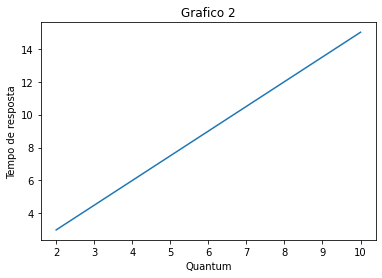

In [50]:
plt.plot(xQ,yTR)
plt.title('Grafico 2')
plt.ylabel('Tempo de resposta')
plt.xlabel('Quantum')
plt.show()